# Chapter 6: Anomalous Diffusion

<img src="AD_fig_01.jpg" alt="title" width="600px" />

## Motivation

**Anomalous diffusion**: characterizes systems where the diffusive behaviour is not the one of the Brownian motion.

**Example from biology:** 
Macroscale: foraging patterns of animals.
Microscale: motion of organules or transport of proteins in the cytoplasm.

**Key advantages**:
- Descriptions of systems relevant in physics, biology, civil engineering and technology.

### Applications

**Physics**
- Subdiffusion, superdiffusion, enhanced diffusion

**Biological physics**
- Control of diffusion and transport
- Targeted delivery

**Biology**
- Animal foraging patterns and behaviour
- Motion and transport in cells and tissues


## Application example: AnDi Challenge(s)

[AnDi Challenge(s)](http://andi-challenge.org/)

[Objective comparison of methods to decode anomalous diffusion](https://www.nature.com/articles/s41467-021-26320-w)

<img src="AD_fig_02_2.png" alt="title" width="600px" />

## Anomalous diffusion coefficient

**Anomalous diffusion coefficient:** Characterizes diffusion.

**Mean square displacement:** Tool to analyse diffusion.

$$
    \mathrm{MSD}(t) = \langle  x(t+\tau) - x(\tau)  \rangle,
$$


**Time average:** One long enough trajectory, representative of a system.

$$
    \mathrm{tMSD}(t) = \frac{1}{n} \sum_i \left[ x(t+\tau_i) - x(\tau_i) \right]^2,
$$

**Ensamble average:** Many trajectories representative of a system.

$$
    \mathrm{eMSD}(t) = \frac{1}{n} \sum_i \left[ x_i(t+\tau) - x_i(\tau) \right]^2,
$$

**Ergodic systems:** 

$$
\mathrm{tMSD} = \mathrm{eMSD}
$$

Examples of ergodic systems: 
- Brownian particle (overdamped regime)
- Brownian particle (inertial)
- Optically trapped Brownian particle




Function calculating the tMSD:

$$
    \mathrm{MSD}(t) = \langle  x(t+\tau) - x(\tau)  \rangle,
$$


In [1]:
import math
import numpy as np 

def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

Function calculating the eMSD

$$
    \mathrm{eMSD}(t) = \frac{1}{n} \sum_i \left[ x_i(t+\tau) - x_i(\tau) \right]^2,
$$

In [2]:
def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

## Brownian Motion - Recap

From Chapter 5.

**Langevin equation, viscous regime:**

$$
    \gamma \dot{x} = \sqrt{2k_{\mathrm{B}}T \gamma} \, W(t),  
$$


Solution with finite difference:

$$
    x_i = x_{i-1} + \sqrt{\frac{2k_{\mathrm{B}}T\Delta t}{\gamma}} w_i.
$$

### Simulation: inertial and viscous regimes

Implement a function to simulate the solution for the Langevin equation with inertia and without inertia (viscous, overdamped regime)

Perform the numerical solution for a colloidal particle in water at room temperature.

In [3]:
# Simulation for a colloidal particle in water at room temperature.

R = 1e-6  # Radius of the Brownian particle [m].
eta = 1e-3  # Viscosity of the medium.
gamma = 6 * np.pi * R * eta  # Drag coefficient of the medium. 
kBT = 4.11e-21  # kB*T at room temperature [J].
D = kBT / gamma  # Diffusion constant [m^2 / s].


Evolution for viscous regime (no inertia).

In [4]:
dt = 1e-3  # Time step [s]. For viscous simulation.

# Coefficients for the finite difference solution.
c_noise = np.sqrt(2 * D * dt)

# Simulation for tMSD. Long trajectory with 1e+6 points.
N_steps_t = int(1e+6)
duration_t = N_steps_t * dt  # Total time [s].

# Simulation for eMSD. 1e+3 trajectories with 1e+3 points each.
N_steps_e = int(1e+3)
duration_e = N_steps_e * dt  # Total time [s].
N_traj = 1000

x0 = 0  # Initial position [m].

# Generate long trajectory for time average.

x_t = np.zeros(N_steps_t)
rn_t = np.random.normal(0, 1, N_steps_t)
    
x_t[0] = x0

for n in range(N_steps_t - 1):
    x_t[n + 1] = x_t[n] + c_noise * rn_t[n]

# Build the time dependence.
t_t = dt * np.arange(N_steps_t)

# Calculate tMSD
tmsd = tMSD_1d(x_t, L=N_steps_e)  # Note: L=N_steps_e.

# Define the time dependence for tMSD (and later eMSD)
t_delay = dt * np.arange(N_steps_e)


Plot time dependence and tMSD.

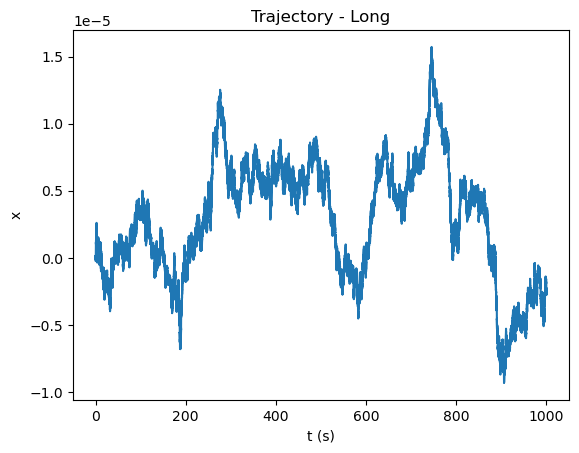

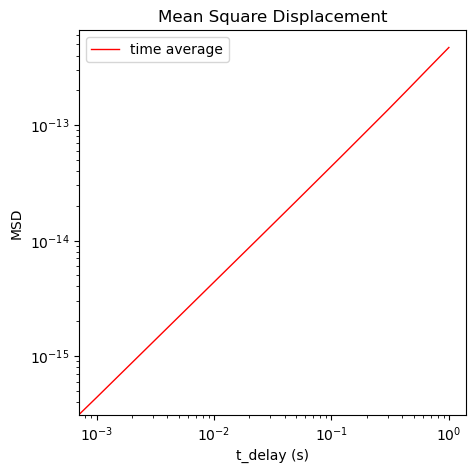

In [5]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(t_t, x_t)
plt.title('Trajectory - Long')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.show()

plt.figure(figsize=(5, 5))
plt.loglog(t_delay, tmsd, '-', color='r', linewidth=1, label='time average')
plt.legend()
plt.title('Mean Square Displacement')
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Now generate ensamble trajectories.

In [6]:
x0 = 0  # Initial position [m].

# Generate N_traj trajectories for ensemble average.
x_e = np.zeros([N_traj, N_steps_e])
rn_e = np.random.normal(0, 1, size=(N_traj, N_steps_e))

for i in range(N_traj):
    x_e[i, 0] = x0
    for n in range(N_steps_e - 1):
        x_e[i, n + 1] = x_e[i, n] + c_noise * rn_e[i, n]
    
# Build the time dependence.
t_e = dt * np.arange(N_steps_e)

# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

Plot time dependence and eMSD.

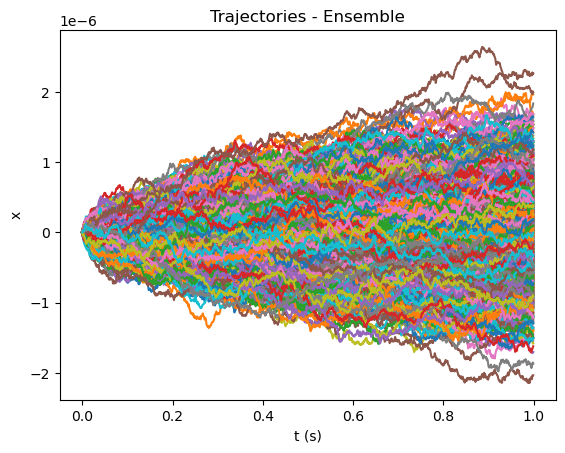

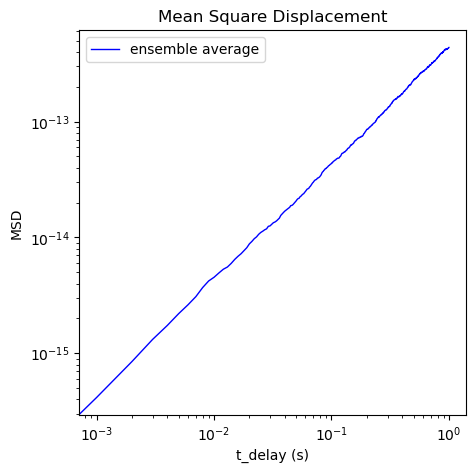

In [7]:
plt.figure()
for i in range(N_traj):
    plt.plot(t_e, x_e[i, :])
plt.title('Trajectories - Ensemble')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.show()

plt.figure(figsize=(5,5))
plt.loglog(t_delay, emsd, '-', color='b', linewidth=1, 
           label='ensemble average')
plt.legend()
plt.title('Mean Square Displacement')
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Let's compare tMSD and eMSD

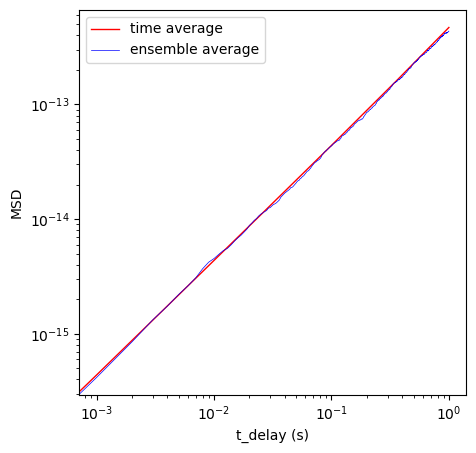

In [8]:
plt.figure(figsize=(5,5))
plt.loglog(t_delay, tmsd, '-', color='r', linewidth=1, 
           label='time average')
plt.plot(t_delay, emsd, '-', color='b', linewidth=0.5, 
         label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

This shows that the system is ergodic.

Let's check the case of the optically trapped particle. 

We know it is ergodic.

Can we show it in simulation?

In [9]:
k = 1e-6  # Trapping stiffness [N/m].

dt = 1e-3  # Time step [s]. For viscous simulation.

# Coefficients for the finite difference solution.
c_noise = np.sqrt(2 * D * dt)
c_trap = k / gamma * dt

# Simulation for tMSD. Long trajectory with 1e+6 points.
N_steps_t = int(1e+6)
duration_t = N_steps_t * dt  # Total time [s].

# Simulation for eMSD. 1e+3 trajectories with 1e+3 points each.
N_steps_e = int(1e+3)
duration_e = N_steps_e * dt  # Total time [s].
N_traj = 1000

x0 = 0  # Initial position [m].

# Generate long trajectory for time average.

x_t = np.zeros(N_steps_t)
rn_t = np.random.normal(0, 1, N_steps_t)
    
x_t[0] = x0

for n in range(N_steps_t - 1):
    x_t[n + 1] = x_t[n] - c_trap * x_t[n] + c_noise * rn_t[n]

# Build the time dependence.
t_t = dt * np.arange(N_steps_t)

# Calculate tMSD
tmsd = tMSD_1d(x_t, L=N_steps_e)  # Note: L=N_steps_e.

# Define the time dependence for tMSD (and later eMSD)
t_delay = dt * np.arange(N_steps_e)


Plot time dependence and tMSD.

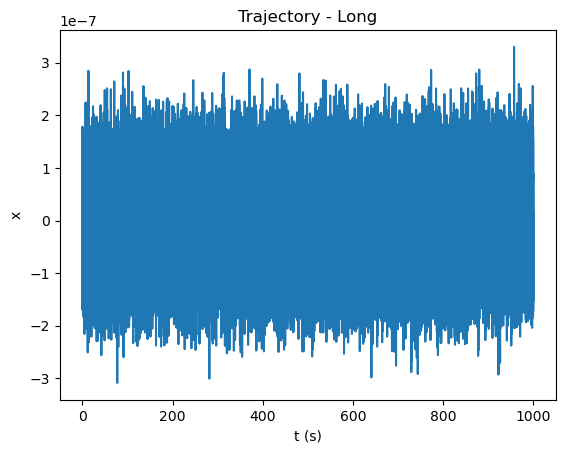

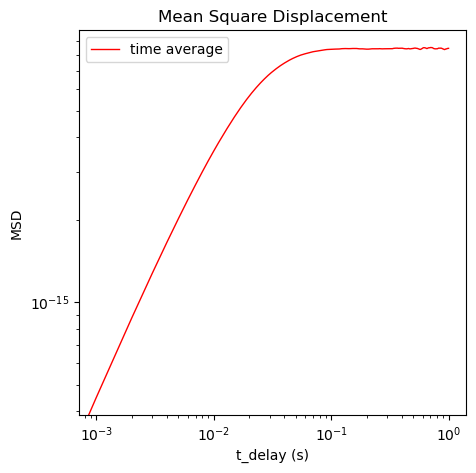

In [10]:
plt.figure()
plt.plot(t_t, x_t)
plt.title('Trajectory - Long')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.show()


plt.figure(figsize=(5,5))
plt.loglog(t_delay, tmsd, '-', color='r', linewidth=1, 
         label='time average')
plt.legend()
plt.title('Mean Square Displacement')
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Now generate ensamble trajectories.

In [11]:
x0 = 0  # Initial position [m].

# Generate N_traj trajectories for ensemble average.
x_e = np.zeros([N_traj, N_steps_e])
rn_e = np.random.normal(0, 1, size=(N_traj, N_steps_e))

for i in range(N_traj):
    x_e[i, 0] = x0
    for n in range(N_steps_e - 1):
        x_e[i, n + 1] = x_e[i, n] - c_trap * x_e[i, n] + c_noise * rn_e[i, n]
    
# Build the time dependence.
t_e = dt * np.arange(N_steps_e)

# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

Plot time dependence and eMSD.

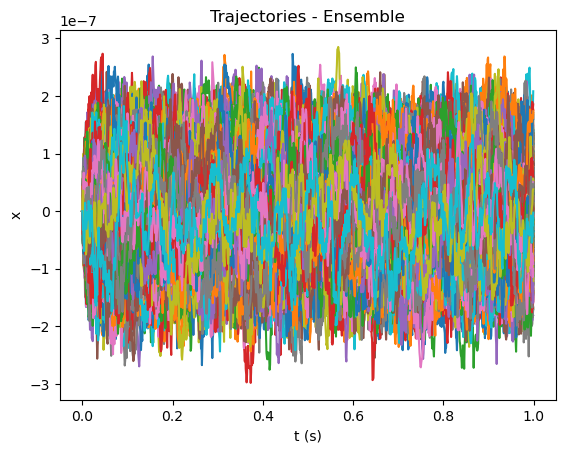

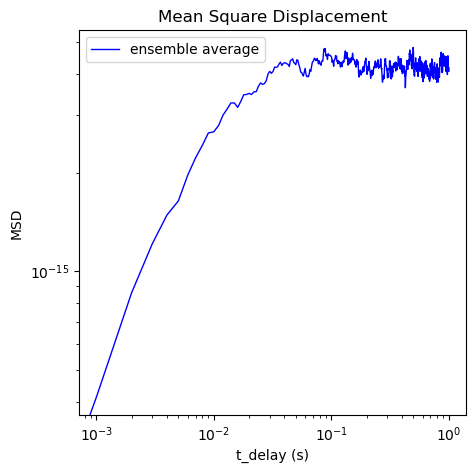

In [12]:
plt.figure()
for i in range(N_traj):
    plt.plot(t_e, x_e[i, :])
plt.title('Trajectories - Ensemble')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.show()


plt.figure(figsize=(5,5))
plt.loglog(t_delay, emsd, '-', color='b', linewidth=1, 
         label='ensemble average')
plt.legend()
plt.title('Mean Square Displacement')
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Let's compare tMSD and eMSD

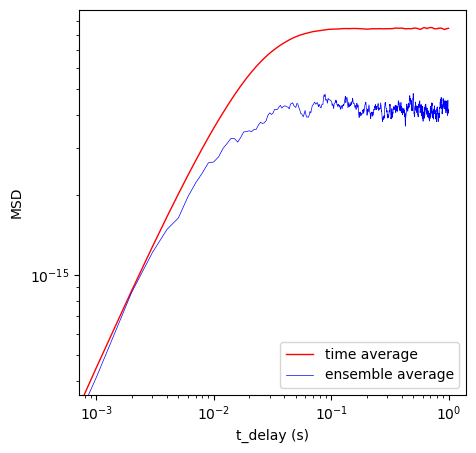

In [13]:
plt.figure(figsize=(5,5))
plt.loglog(t_delay, tmsd, '-', color='r', linewidth=1, 
         label='time average')
plt.plot(t_delay, emsd, '-', color='b', linewidth=0.5, 
         label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

### Breaking of ergodicity?

We know it must be ergodic... 

...any ideas?

...

...

...

Are we simulating correctly?



In [14]:
x0 = 0  # Initial position [m].

# We must let the system to termalize a bit each time.
N_steps_thermalization = 1000

# Generate N_traj trajectories for ensemble average.
x_e = np.zeros([N_traj, N_steps_e])
rn_e = np.random.normal(0, 1, size=(N_traj, N_steps_e))

for i in range(N_traj):
    # Thermalization cycle.
    x = x0
    rn_therm = np.random.normal(0, 1, N_steps_thermalization)
    for n in range(N_steps_thermalization - 1):
        x = x - c_trap * x + c_noise * rn_therm[n]
    # Starts from thermalized position.
    x_e[i, 0] = x  # 
    for n in range(N_steps_e - 1):
        x_e[i, n + 1] = x_e[i, n] - c_trap * x_e[i, n] + c_noise * rn_e[i, n]
    
# Build the time dependence.
t_e = dt * np.arange(N_steps_e)

# Calculate eMSD
emsd_therm = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

Plot time dependence and eMSD for the thermalized trajectories.

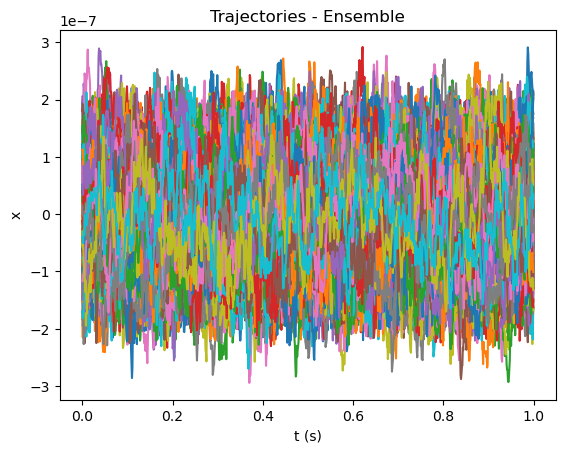

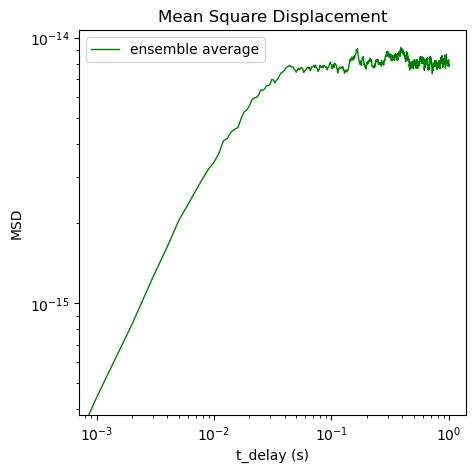

In [15]:
plt.figure()
for i in range(N_traj):
    plt.plot(t_e, x_e[i, :])
plt.title('Trajectories - Ensemble')
plt.xlabel('t (s)')
plt.ylabel('x')
plt.show()

plt.figure(figsize=(5,5))
plt.loglog(t_delay, emsd_therm, '-', color='g', linewidth=1, 
         label='ensemble average')
plt.legend()
plt.title('Mean Square Displacement')
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

Let's compare tMSD and eMSD

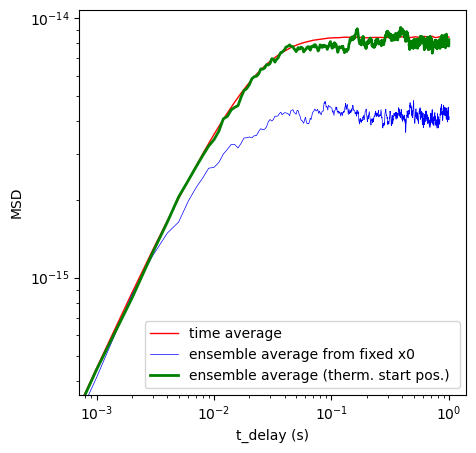

In [16]:
plt.figure(figsize=(5,5))
plt.loglog(t_delay, tmsd, '-', color='r', linewidth=1, 
         label='time average')
plt.loglog(t_delay, emsd, '-', color='b', linewidth=0.5, 
         label='ensemble average from fixed x0')
plt.loglog(t_delay, emsd_therm, '-', color='g', linewidth=2, 
         label='ensemble average (therm. start pos.) ')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()

The problem was that we were not simulating the ensamble correctly!

**The system is to be allowed to thermalize**

### Regularization and normalization

Models for anomalous diffusion often generate trajectories that are non-uniformly sampled in time. 

Moreover: the average and standard deviation of the trajectories varies from model to model.

Need to: 
- regularize in time a time non-uniformly sampled trajectory
- normalize a regularized trajectory


In [17]:
def regularize(x_nu, t_nu, t):
    """
    Function to regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.

    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        
        # Select the spots in x (wanted trajectory) to set.
        s_end = np.where(t < t_nu[i+1])[0][-1]                 

        # Assign the values of the segment.
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1]-t_nu[i]) 
        
        # Update the position in the wanted trajectory.
        s = s_end + 1                                           
        
    return x


In [18]:
def normalize(x_nn):
    """
    Function to normalize a regular trajectory.
    
    Parameters
    ==========
    x_nn : Trajectory (x component) non-nrmalized.
    """
    x = np.zeros(np.size(x_nn))
    dx = x_nn[1:] - x_nn[0:-1]
    
    sigma = np.std(dx**2)
    
    x = x_nn[0] + np.cumsum(dx / sigma)
    
    mu = np.mean(x)
    
    x -= mu
        
    return x



### Scaled Brownian Motion

The time is rescaled: $t_{\rm s} = t^{1/\alpha}$

${\rm MSD} \propto  t_{\rm s}^{\alpha}$

- Simulate a regular Brownian motion trajectory and generate a series of positions $x_s$ corresponding to times $t_{\rm s}$.
- Rescale the times array such that $t_{\rm s} = t^{1/\alpha}$. 
- Regularize the trajectory 

SBM is non-ergodic.

In [19]:
def SBM(t_tot, N, alpha):
    """
    Function to generate a scaled Brownian motion with exponent alpha.
    
    Parameters
    ==========
    t_tot : Duration of the SBM.
    N : Number of time steps in the initial Brownian trajectory.
    alpha : Exponent.
    dt : Time step for the regularize trajectory.
    """
    
    # Generate the initial Brownian trajectory.
    t_tot_B = t_tot**alpha
    t_B = t_tot_B * np.arange(N) / (N - 1)
    t_s = t_B ** (1 / alpha)
    
    rn = np.random.normal(0, 1, N)
    x_B = np.cumsum(rn) - rn[0]
        
    return x_B, t_s

In [20]:
t_tot = 100  # Duration.
N = 100  # Number of points in the trajectory.

dt = 0.1  # Time step for the regularization.

# Regular sampling with dt.
t = np.arange(int(np.ceil(t_tot / dt))) * dt

# SBM (alpha = 1)
alpha = 1
x1, t1 = SBM(t_tot, N, alpha)
x1_r = regularize(x1, t1, t)  # Regularize x1

# SBM (alpha = 2)
alpha = 2
x2, t2 = SBM(t_tot, N, alpha)
x2_r = regularize(x2, t2, t)  # Regularize x2

# SBM (alpha = 0.5)
alpha = 0.5
xh, th = SBM(t_tot, N, alpha)
xh_r = regularize(xh, th, t)  # Regularize xh

Let's plot the motion for $\alpha = 0.5$

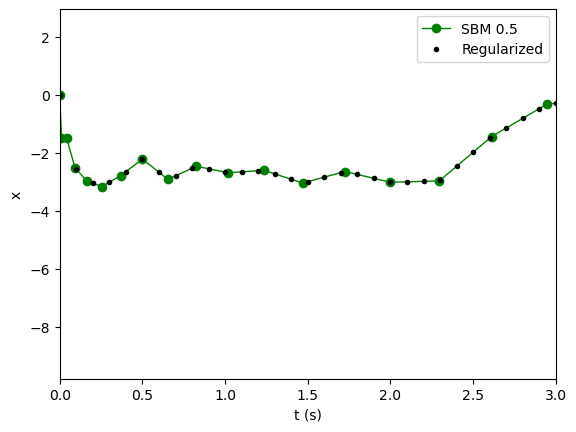

In [21]:
plt.figure()
plt.plot(th, xh, 'o-', color='g', linewidth=1, label='SBM 0.5')
plt.plot(t, xh_r, '.', color='k', label='Regularized')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x')
plt.xlim([0, 3])
plt.show()

Let's see different SMB with different exponents.

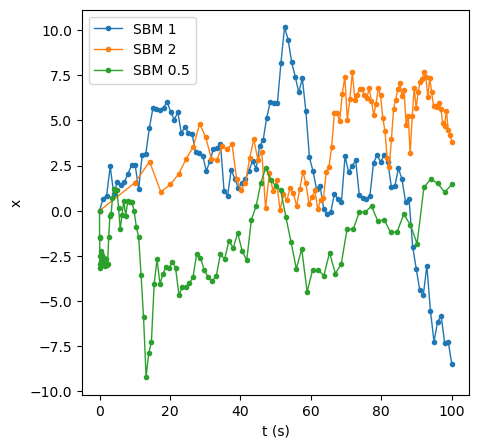

In [22]:
plt.figure(figsize=(5,5))
plt.plot(t1, x1, '.-', linewidth=1, label='SBM 1')
plt.plot(t2, x2, '.-', linewidth=1, label='SBM 2')
plt.plot(th, xh, '.-', linewidth=1, label='SBM 0.5')
plt.legend()
plt.xlabel('t (s)')
plt.ylabel('x')
# plt.xlim([0, 20])  # Uncomment to show details close to t=0.
plt.show()

### Is SBM ergodic?

For $\alpha = 1$ : yes, it is the usual Brownian motion.

Let's check $\alpha \ne 1$ and compare tMSD and eMSD

In [ ]:
alpha = 1.5  # Try also 2, 0.5


# Time average.

t_tot = 10000  # Duration.
N = 10000  # Number of points in the trajectory.
dt = 0.1  # Time step for the regularization.

# Regular sampling with dt.
t_t = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_t = np.size(t_t)

# SBM 
x, t_nu = SBM(t_tot, N, alpha)
x_t = regularize(x, t_nu, t_t)  # Regularize x


# Ensemble average.

t_tot = 100  # Duration.
N = 100  # Number of points in the trajectory.
dt = 0.1  # Time step for the regularization.

# Regular sampling with dt.
t_e = np.arange(int(np.ceil(t_tot / dt))) * dt
N_steps_e = np.size(t_e)

N_traj = 100

x0 = 0  # Initial position [m].

# Generate N_traj trajectories for ensemble average.
x_e = np.zeros([N_traj, N_steps_e])

for i in range(N_traj):
    x, t_nu = SBM(t_tot, N, alpha)
    print(len(x),len(t_nu))
    x_r = regularize(x, t_nu, t_e)  # Regularize x
    print(len(x_r))
    x_e[i, :] = x_r 
    

# Calculate eMSD
emsd = eMSD_1d(x_e)  # eMSD from ensemble trajectories.

# Calculate eMSD
tmsd = tMSD_1d(x_t, N_steps_e)  # tMSD from long trajectory.





Plotting of eMSD and tMSD

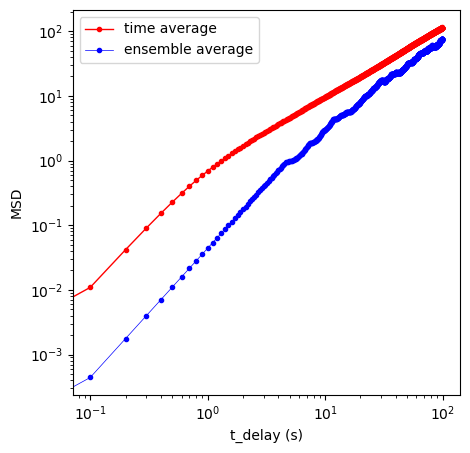

In [24]:
plt.figure(figsize=(5,5))
plt.loglog(t_e, tmsd, '.-', color='r', linewidth=1, 
         label='time average')
plt.loglog(t_e, emsd, '.-', color='b', linewidth=0.5, 
         label='ensemble average')
plt.legend()
plt.xlabel('t_delay (s)')
plt.ylabel('MSD')
plt.show()